In [ ]:
import warnings

warnings.filterwarnings("ignore")

# CIFAR-10


In [9]:
!ls ../data/cifar-10/gen/nr_0.1_nt_symmetric_cvpr/stats_nr_0.1.csv
!ls ../data/cifar-10/gen/nr_0.25_nt_symmetric_cvpr/stats_nr_0.25.csv
!ls ../data/cifar-10/gen/nr_0.5_nt_symmetric_cvpr/stats_nr_0.5.csv
!ls ../data/cifar-10/gen/nr_0.75_nt_symmetric_cvpr/stats_nr_0.75.csv
!ls ../data/cifar-10/gen/nr_0.9_nt_symmetric_cvpr/stats_nr_0.9.csv

../data/cifar-10/gen/nr_0.1_nt_symmetric_cvpr/stats_nr_0.1.csv
../data/cifar-10/gen/nr_0.25_nt_symmetric_cvpr/stats_nr_0.25.csv
../data/cifar-10/gen/nr_0.5_nt_symmetric_cvpr/stats_nr_0.5.csv
../data/cifar-10/gen/nr_0.75_nt_symmetric_cvpr/stats_nr_0.75.csv
../data/cifar-10/gen/nr_0.9_nt_symmetric_cvpr/stats_nr_0.9.csv


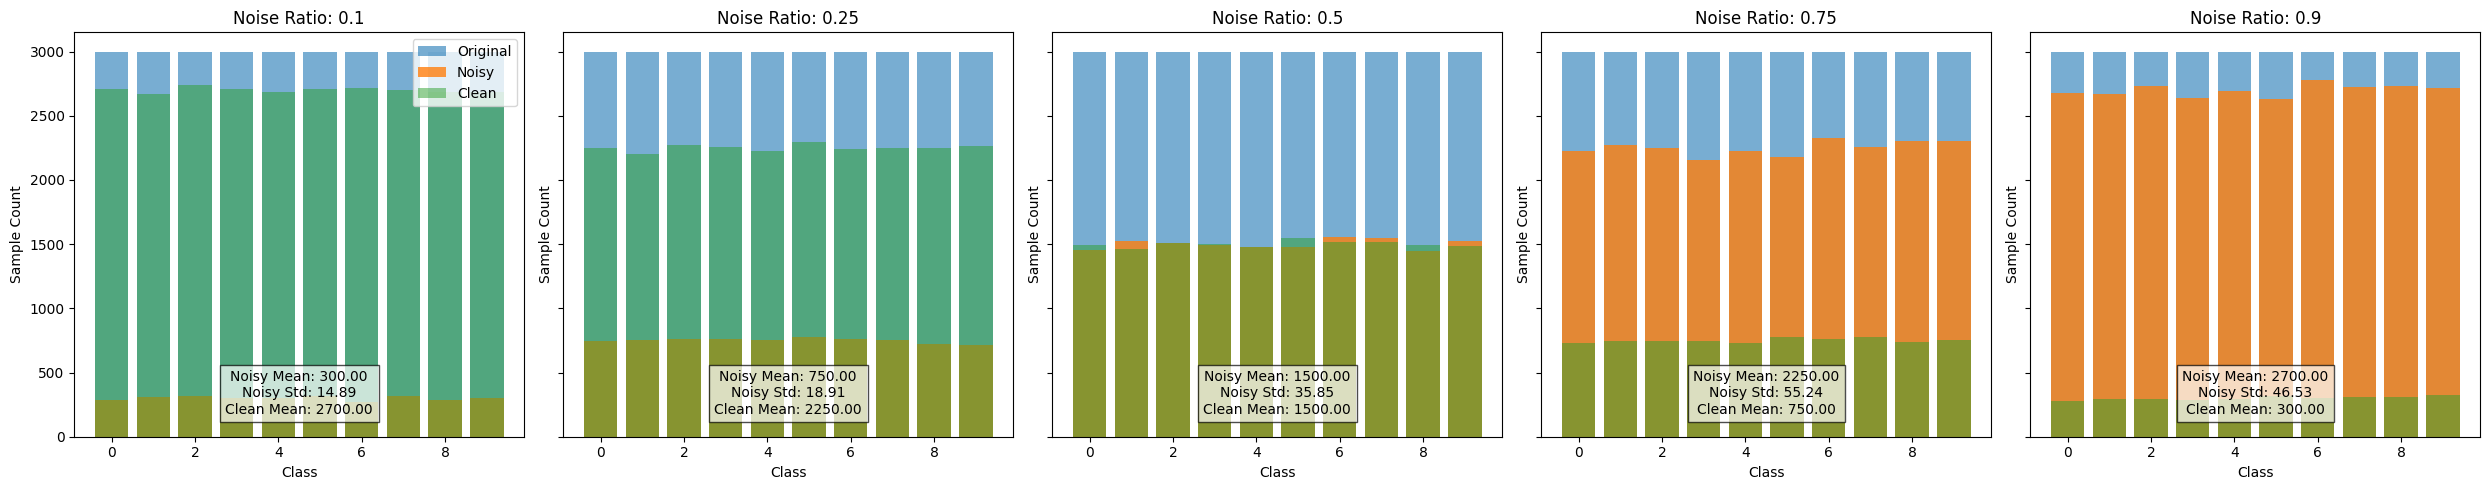

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths for the uploaded CIFAR-10 CSV files
file_paths = {
    "0.1": "../data/cifar-10/gen/nr_0.1_nt_symmetric_cvpr/stats_nr_0.1.csv",
    "0.25": "../data/cifar-10/gen/nr_0.25_nt_symmetric_cvpr/stats_nr_0.25.csv",
    "0.5": "../data/cifar-10/gen/nr_0.5_nt_symmetric_cvpr/stats_nr_0.5.csv",
    "0.75": "../data/cifar-10/gen/nr_0.75_nt_symmetric_cvpr/stats_nr_0.75.csv",
    "0.9": "../data/cifar-10/gen/nr_0.9_nt_symmetric_cvpr/stats_nr_0.9.csv",
}

# Load data into a dictionary of DataFrames
stats_data = {ratio: pd.read_csv(file_path) for ratio, file_path in file_paths.items()}

# Visualization: Draw all plots in a single row
fig, axes = plt.subplots(1, 5, figsize=(25, 5), sharey=True)

for i, (noise_ratio, data) in enumerate(stats_data.items()):
    ax = axes[i]
    ax.bar(data["Class"], data["Original Count"], label="Original", alpha=0.6)
    ax.bar(data["Class"], data["Noisy Count"], label="Noisy", alpha=0.8)
    ax.bar(data["Class"], data["Clean Count"], label="Clean", alpha=0.5)
    ax.set_title(f"Noise Ratio: {noise_ratio}")
    ax.set_xlabel("Class")
    ax.set_ylabel("Sample Count")

    # Add summary statistics as text in the empty area of the plot
    noisy_mean = data["Noisy Count"].mean()
    noisy_std = data["Noisy Count"].std()
    clean_mean = data["Clean Count"].mean()
    ax.text(
        4.5, 180,  # Coordinates to position text
        f"Noisy Mean: {noisy_mean:.2f}\n"
        f"Noisy Std: {noisy_std:.2f}\n"
        f"Clean Mean: {clean_mean:.2f}",
        fontsize=10,
        ha="center",
        bbox=dict(facecolor="white", alpha=0.7, edgecolor="black"),
    )

# Add legend to the first plot
axes[0].legend(loc="upper right")
plt.tight_layout()
plt.show()


```tex
\section{CIFAR-10 Dataset Generation and Visualization}

\subsection{Data Generation Process}
The CIFAR-10 dataset consists of 10 classes, each containing 6,000 samples, with 5000 samples for training and 1000 for testing per class. To evaluate the impact of label noise on classification performance, we inject symmetric label noise under different noise ratios $\eta \in \{0.1, 0.25, 0.5, 0.75, 0.9\}$. The dataset generation process is as follows:

\begin{itemize}
    \item \textbf{Noise Ratio Definition}: A noise ratio $\eta$ specifies the fraction of samples whose labels are corrupted within the training set.
    \item \textbf{Noise Injection}: Samples for noise injection are randomly selected from the training set according to $\eta$. The labels of the selected samples are replaced with random labels chosen uniformly from all possible classes (symmetric noise).
    \item \textbf{Dataset Partitioning}: After introducing noise, the training dataset is divided into:
    \begin{itemize}
        \item \textbf{Original Count}: The total number of samples per class in the original dataset remains unchanged.
        \item \textbf{Noisy Count}: The number of samples per class whose labels have been replaced with random labels.
        \item \textbf{Clean Count}: The number of samples per class whose labels remain unchanged.
    \end{itemize}
    \item \textbf{Statistical Logging}: For each noise ratio, we log the class-wise sample distribution into statistical files (CSV format) for validation and analysis.
\end{itemize}

\subsection{Visualization and Analysis}
To validate the noise injection process, we visualize the class-wise sample distribution for the training dataset under different noise ratios $\eta \in \{0.1, 0.25, 0.5, 0.75, 0.9\}$. Figure~\ref{fig:cifar10-noise-distribution} presents the distributions for all classes. Each subfigure illustrates the number of samples in three categories:
\begin{itemize}
    \item \textbf{Original Count}: The total number of samples per class (fixed at 3,000 for CIFAR-10 with a 0.4 split ratio).
    \item \textbf{Noisy Count}: The number of samples whose labels have been corrupted.
    \item \textbf{Clean Count}: The number of samples whose labels remain uncorrupted.
\end{itemize}

\begin{figure*}[ht]
    \centering
    \includegraphics[width=\textwidth]{cifar10-noise-distribution.png}
    \caption{Visualization of sample distributions for CIFAR-10 under different symmetric noise ratios. Each subfigure represents the distribution of samples across 10 classes for three categories: Original, Noisy, and Clean. Summary statistics (mean and standard deviation of noisy samples) are shown within each plot.}
    \label{fig:cifar10-noise-distribution}
\end{figure*}

\subsection{Key Observations}
The visualizations in Figure~\ref{fig:cifar10-noise-distribution} reveal the following trends:
\begin{itemize}
    \item \textbf{Low Noise Ratios ($\eta=0.1$ and $\eta=0.25$)}:
    \begin{itemize}
        \item Most samples retain their original labels, with noisy samples forming a small proportion of the total.
        \item The standard deviation of noisy samples across classes is low, indicating a uniform noise distribution.
    \end{itemize}
    \item \textbf{Moderate Noise Ratio ($\eta=0.5$)}:
    \begin{itemize}
        \item The training dataset exhibits an equal split between noisy and clean samples.
        \item The distribution of noisy samples becomes slightly uneven, as reflected by the increased standard deviation.
    \end{itemize}
    \item \textbf{High Noise Ratios ($\eta=0.75$ and $\eta=0.9$)}:
    \begin{itemize}
        \item Noisy samples dominate the dataset, with clean samples reduced to a minor proportion.
        \item The standard deviation of noisy samples remains high, indicating class-specific noise variation.
    \end{itemize}
\end{itemize}

This analysis demonstrates that the generated datasets align with the intended noise ratios, providing a reliable foundation for evaluating noise-robust learning algorithms on CIFAR-10.
```

# CIFAR-100


In [5]:
!pwd
!tree ../data/cifar-100/gen/

/nvme/szh/code/tta-mr/result_analysis
../data/cifar-100/gen/
├── aux_data.npy
├── aux_label.npy
├── inc_data.npy
├── inc_label.npy
├── nr_0.5_nt_asymmetric_cvpr
│   ├── train_clean_data.npy
│   ├── train_clean_labels.npy
│   ├── train_noisy_data.npy
│   ├── train_noisy_labels.npy
│   └── train_noisy_true_labels.npy
├── pretrain_data.npy
├── pretrain_label.npy
├── test_data.npy
├── test_label.npy
├── train_data.npy
└── train_label.npy

1 directory, 15 files


In [2]:
!ls ../data/cifar-100/gen/nr_0.1_nt_asymmetric_cvpr/stats_nr_0.1.csv
!ls ../data/cifar-100/gen/nr_0.25_nt_asymmetric_cvpr/stats_nr_0.25.csv
!ls ../data/cifar-100/gen/nr_0.5_nt_asymmetric_cvpr/stats_nr_0.5.csv
!ls ../data/cifar-100/gen/nr_0.75_nt_asymmetric_cvpr/stats_nr_0.75.csv
!ls ../data/cifar-100/gen/nr_0.9_nt_asymmetric_cvpr/stats_nr_0.9.csv

../data/cifar-100/gen/nr_0.1_nt_asymmetric_cvpr/stats_nr_0.1.csv
../data/cifar-100/gen/nr_0.25_nt_asymmetric_cvpr/stats_nr_0.25.csv
../data/cifar-100/gen/nr_0.5_nt_asymmetric_cvpr/stats_nr_0.5.csv
../data/cifar-100/gen/nr_0.75_nt_asymmetric_cvpr/stats_nr_0.75.csv
../data/cifar-100/gen/nr_0.9_nt_asymmetric_cvpr/stats_nr_0.9.csv


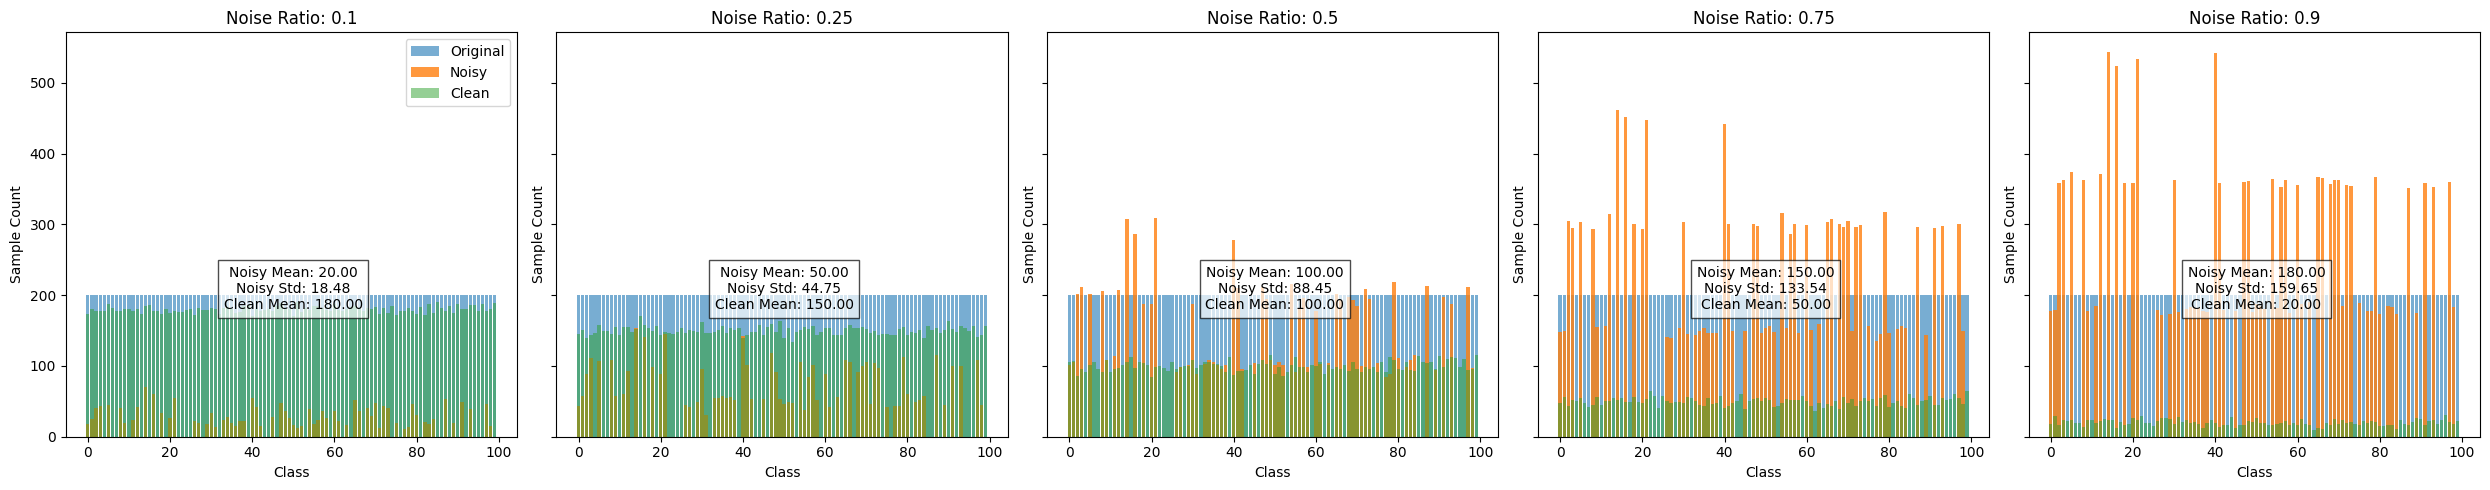

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 数据文件路径
file_paths = {
    "0.1": "../data/cifar-100/gen/nr_0.1_nt_asymmetric_cvpr/stats_nr_0.1.csv",
    "0.25": "../data/cifar-100/gen/nr_0.25_nt_asymmetric_cvpr/stats_nr_0.25.csv",
    "0.5": "../data/cifar-100/gen/nr_0.5_nt_asymmetric_cvpr/stats_nr_0.5.csv",
    "0.75": "../data/cifar-100/gen/nr_0.75_nt_asymmetric_cvpr/stats_nr_0.75.csv",
    "0.9": "../data/cifar-100/gen/nr_0.9_nt_asymmetric_cvpr/stats_nr_0.9.csv",
}

# Load data into a dictionary of DataFrames
stats_data = {ratio: pd.read_csv(file_path) for ratio, file_path in file_paths.items()}

# Visualization: Draw all plots in a single row
fig, axes = plt.subplots(1, 5, figsize=(25, 5), sharey=True)

for i, (noise_ratio, data) in enumerate(stats_data.items()):
    ax = axes[i]
    ax.bar(data["Class"], data["Original Count"], label="Original", alpha=0.6)
    ax.bar(data["Class"], data["Noisy Count"], label="Noisy", alpha=0.8)
    ax.bar(data["Class"], data["Clean Count"], label="Clean", alpha=0.5)
    ax.set_title(f"Noise Ratio: {noise_ratio}")
    ax.set_xlabel("Class")
    ax.set_ylabel("Sample Count")

    # Dynamically calculate summary statistics
    noisy_mean = data["Noisy Count"].mean()
    noisy_std = data["Noisy Count"].std()
    clean_mean = data["Clean Count"].mean()
    ax.text(
        50, 180,  # Coordinates to position text
        f"Noisy Mean: {noisy_mean:.2f}\n"
        f"Noisy Std: {noisy_std:.2f}\n"
        f"Clean Mean: {clean_mean:.2f}",
        fontsize=10,
        ha="center",
        bbox=dict(facecolor="white", alpha=0.7, edgecolor="black"),
    )

# Add legend to the first plot
axes[0].legend(loc="upper right")
plt.tight_layout()
plt.show()


```tex
\section{CIFAR-100 Dataset Generation and Visualization}

\subsection{Data Generation Process}
The CIFAR-100 dataset consists of 100 classes, each containing 200 samples. To introduce label noise for experimental purposes, we utilize the following procedure:

\begin{itemize}
    \item \textbf{Noise Ratio}: We define a noise ratio $\eta \in \{0.1, 0.25, 0.5, 0.75, 0.9\}$, which specifies the proportion of samples whose labels are corrupted.
    \item \textbf{Noise Injection}: Based on the noise ratio $\eta$, we randomly select a subset of samples from the dataset. These selected samples have their labels replaced according to a predefined mapping:
    \begin{itemize}
        \item For \textbf{asymmetric noise}, the label of a sample is replaced with another label within the same superclass (e.g., replacing "rose" with "orchid").
        \item For \textbf{symmetric noise}, the label of a sample is replaced with a label chosen uniformly at random across all classes.
    \end{itemize}
    \item \textbf{Dataset Partitioning}: After introducing label noise, the dataset is partitioned into three parts:
    \begin{itemize}
        \item \textbf{Original Count}: The total number of samples in each class remains fixed at 200.
        \item \textbf{Noisy Count}: The number of samples in each class whose labels have been corrupted.
        \item \textbf{Clean Count}: The number of samples in each class whose labels remain clean.
    \end{itemize}
\end{itemize}

The generated noisy datasets are saved in separate files, and statistical information (e.g., class distributions) is logged for validation and analysis.

\subsection{Visualization and Analysis}
To validate the noise injection process, we visualize the sample distribution across all 100 classes under different noise ratios ($\eta$). Figure~\ref{fig:cifar100-noise-distribution} shows the distributions for $\eta \in \{0.1, 0.25, 0.5, 0.75, 0.9\}$.

% \begin{figure*}[ht]
%     \centering
%     \includegraphics[width=\textwidth]{cifar100-noise-distribution.png}
%     \caption{Visualization of noisy dataset distributions for CIFAR-100 under different noise ratios. Each subfigure represents the distribution of samples across 100 classes. The bar heights indicate the number of samples in each class for three categories: original, noisy, and clean. Summary statistics (mean and standard deviation of noisy samples) are shown in the empty space of each plot.}
%     \label{fig:cifar100-noise-distribution}
% \end{figure*}

\subsection{Key Observations}
The visualizations reveal the following patterns as the noise ratio increases:
\begin{itemize}
    \item At low noise ratios (e.g., $\eta=0.1$), the majority of samples remain clean, and the noisy samples are distributed sparsely across classes.
    \item At moderate noise ratios (e.g., $\eta=0.5$), there is a balance between clean and noisy samples, with most classes showing significant noise injection.
    \item At high noise ratios (e.g., $\eta=0.75$ and $\eta=0.9$), the majority of samples in each class are noisy, and some classes become almost entirely corrupted.
    \item The standard deviation of noisy samples increases with higher noise ratios, indicating a more uneven distribution of noisy samples across classes.
\end{itemize}

The visualization effectively validates the noise injection process and confirms that the generated datasets align with the intended noise ratios. This analysis provides a robust foundation for evaluating the performance of noise-robust learning algorithms on CIFAR-100.
```

# PET-37


验证 base_dir 数据集 (对称噪声):


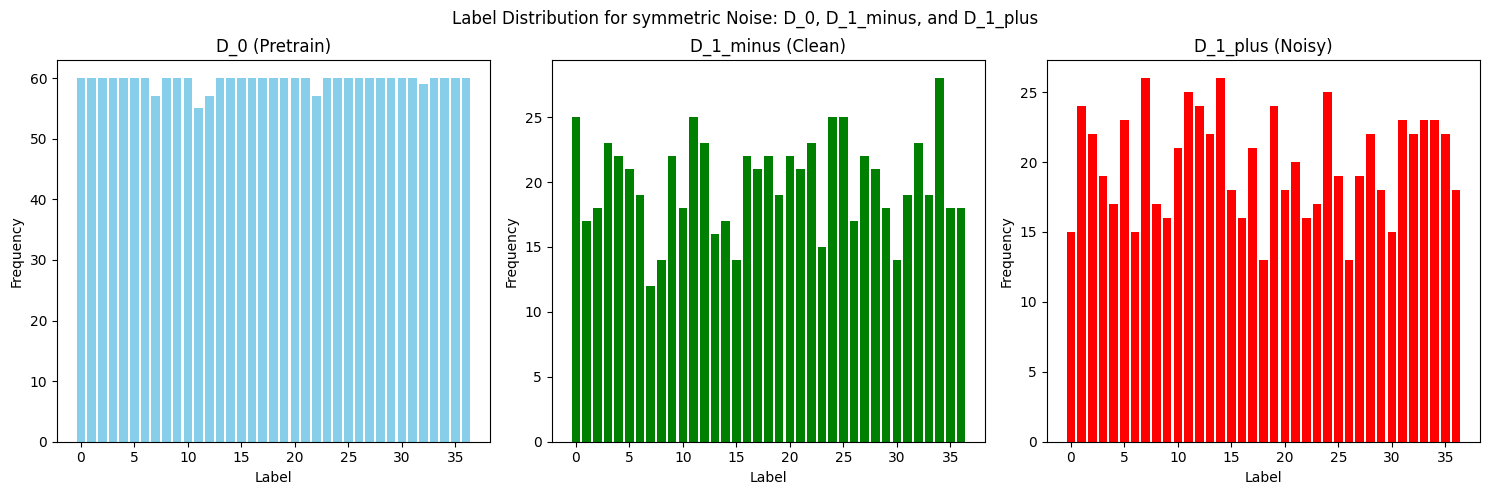

验证 base_dir 数据集 (非对称噪声):


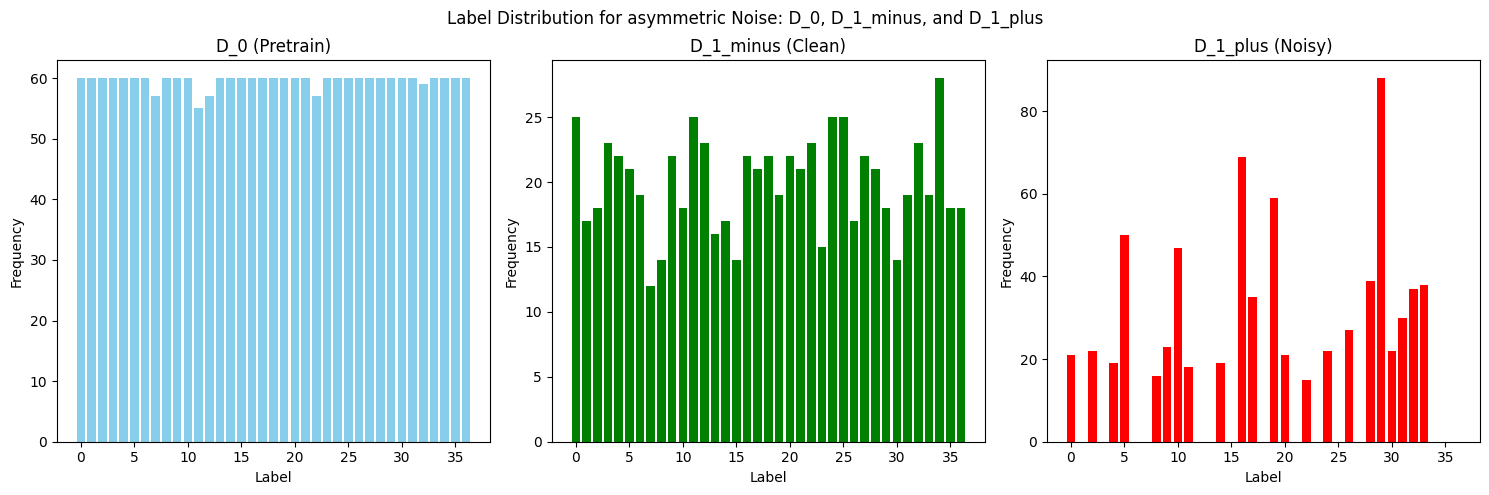

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch

# 校验生成的数据集
# 设置类的数量和增量数据集版本
num_classes = 37  # PET-37 数据集有 37 个类

# 加载 D_0、D_1_minus 和 D_1_plus

def load_dataset(base_dir, dataset_name):
    if dataset_name == "pretrain":
        label_path = os.path.join(base_dir, "pretrain_label.npy")
    elif dataset_name == "nr_0.5_nt_symmetric_cvpr/train_clean":
        label_path = os.path.join(base_dir, "nr_0.5_nt_symmetric_cvpr", "train_clean_labels.npy")
    elif dataset_name == "nr_0.5_nt_symmetric_cvpr/train_noisy":
        label_path = os.path.join(base_dir, "nr_0.5_nt_symmetric_cvpr", "train_noisy_labels.npy")
    elif dataset_name == "nr_0.5_nt_asymmetric_cvpr/train_clean":
        label_path = os.path.join(base_dir, "nr_0.5_nt_asymmetric_cvpr", "train_clean_labels.npy")
    elif dataset_name == "nr_0.5_nt_asymmetric_cvpr/train_noisy":
        label_path = os.path.join(base_dir, "nr_0.5_nt_asymmetric_cvpr", "train_noisy_labels.npy")
    else:
        raise ValueError(f"Invalid dataset name: {dataset_name}")
    
    data_path = os.path.join(base_dir, dataset_name + "_data.npy")
    if not os.path.exists(data_path) or not os.path.exists(label_path):
        raise FileNotFoundError(f"Data or label files not found for {dataset_name}")
    
    data = np.load(data_path, allow_pickle=True)
    labels = np.load(label_path, allow_pickle=True)
    return data, labels

# 验证数据集的标签分布

def validate_label_distribution(base_dir, noise_type):
    plt.style.use("default")
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f"Label Distribution for {noise_type} Noise: D_0, D_1_minus, and D_1_plus")

    # 获取 D_0 数据和标签
    _, labels_D0 = load_dataset(base_dir, "pretrain")
    unique_D0, counts_D0 = np.unique(labels_D0, return_counts=True)
    full_counts_D0 = np.zeros(num_classes)
    full_counts_D0[unique_D0] = counts_D0
    axs[0].bar(range(num_classes), full_counts_D0, color="skyblue")
    axs[0].set_title("D_0 (Pretrain)")
    axs[0].set_xlabel("Label")
    axs[0].set_ylabel("Frequency")
    axs[0].set_xticks(range(0, num_classes, 5))

    # 获取 D_1_minus 数据和标签
    dataset_name_clean = f"nr_0.5_nt_{noise_type}_cvpr/train_clean"
    _, labels_D1_minus = load_dataset(base_dir, dataset_name_clean)
    unique_D1_minus, counts_D1_minus = np.unique(labels_D1_minus, return_counts=True)
    full_counts_D1_minus = np.zeros(num_classes)
    full_counts_D1_minus[unique_D1_minus] = counts_D1_minus
    axs[1].bar(range(num_classes), full_counts_D1_minus, color="green")
    axs[1].set_title("D_1_minus (Clean)")
    axs[1].set_xlabel("Label")
    axs[1].set_ylabel("Frequency")
    axs[1].set_xticks(range(0, num_classes, 5))

    # 获取 D_1_plus 数据和标签
    dataset_name_noisy = f"nr_0.5_nt_{noise_type}_cvpr/train_noisy"
    _, labels_D1_plus = load_dataset(base_dir, dataset_name_noisy)
    unique_D1_plus, counts_D1_plus = np.unique(labels_D1_plus, return_counts=True)
    full_counts_D1_plus = np.zeros(num_classes)
    full_counts_D1_plus[unique_D1_plus] = counts_D1_plus
    axs[2].bar(range(num_classes), full_counts_D1_plus, color="red")
    axs[2].set_title("D_1_plus (Noisy)")
    axs[2].set_xlabel("Label")
    axs[2].set_ylabel("Frequency")
    axs[2].set_xticks(range(0, num_classes, 5))

    plt.tight_layout()
    fig.subplots_adjust(top=0.88)
    plt.show()

# 定义数据集的路径
base_dir = "../data/pet-37/gen"
print("验证 base_dir 数据集 (对称噪声):")
validate_label_distribution(base_dir, "symmetric")
print("验证 base_dir 数据集 (非对称噪声):")
validate_label_distribution(base_dir, "asymmetric")

# TEST CODES


visualization


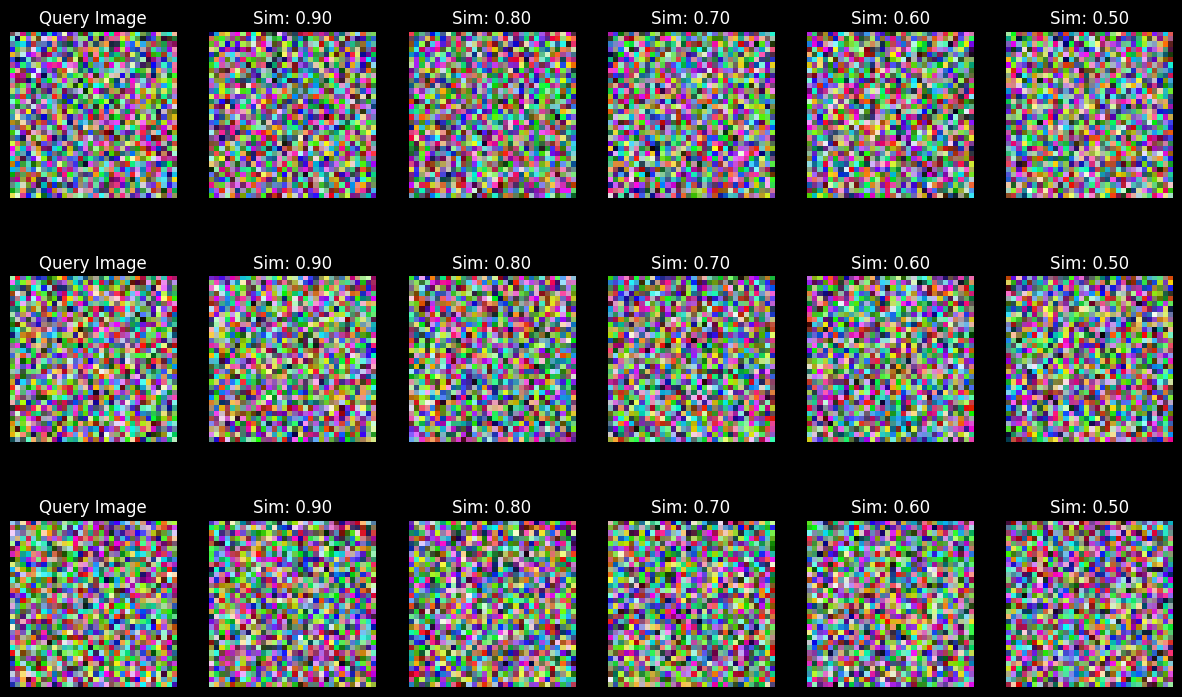

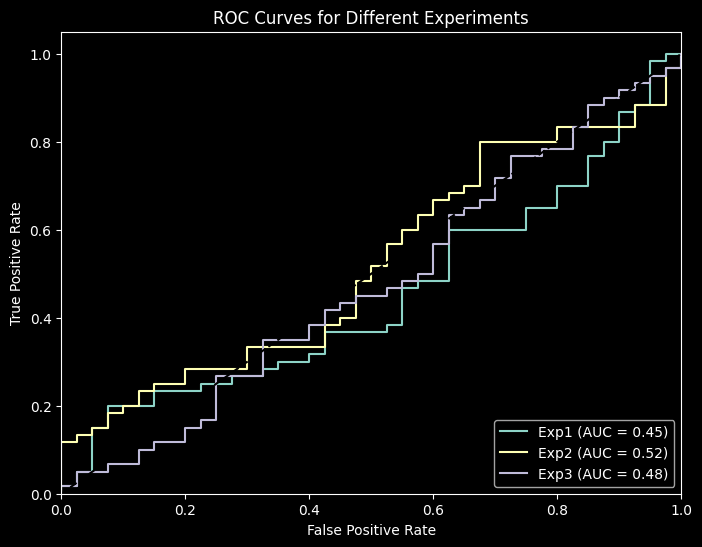

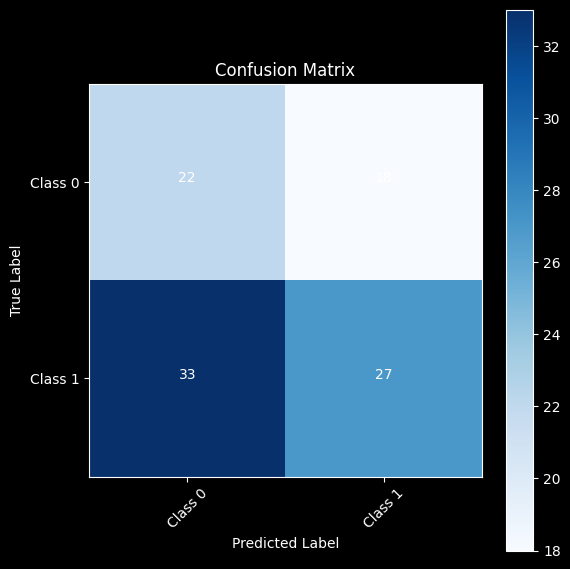

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import roc_curve, auc, confusion_matrix

# 假数据生成
np.random.seed(42)

# 1. 假设的相似度评分 (0-1之间)
sim_scores_exp1 = np.random.rand(5)
sim_scores_exp2 = np.random.rand(5)
sim_scores_exp3 = np.random.rand(5)

# 2. 假设的分类模型的ROC曲线数据 (基于随机预测的假数据)
y_true = np.random.randint(0, 2, 100)
y_scores_exp1 = np.random.rand(100)
y_scores_exp2 = np.random.rand(100)
y_scores_exp3 = np.random.rand(100)

fpr_exp1, tpr_exp1, _ = roc_curve(y_true, y_scores_exp1)
fpr_exp2, tpr_exp2, _ = roc_curve(y_true, y_scores_exp2)
fpr_exp3, tpr_exp3, _ = roc_curve(y_true, y_scores_exp3)

roc_auc_exp1 = auc(fpr_exp1, tpr_exp1)
roc_auc_exp2 = auc(fpr_exp2, tpr_exp2)
roc_auc_exp3 = auc(fpr_exp3, tpr_exp3)

# 3. 假设的混淆矩阵
conf_matrix = confusion_matrix(y_true, np.random.randint(0, 2, 100))


# 1. 显示假设的Image Grid (Top-K相似度检索结果)
def display_fake_image_grid():
    fig, axs = plt.subplots(3, 6, figsize=(15, 9))

    for i in range(3):
        # 第一列是查询图像（随机生成的颜色矩阵）
        axs[i, 0].imshow(np.random.rand(32, 32, 3))
        axs[i, 0].set_title("Query Image")
        axs[i, 0].axis("off")

        # 剩下的5列为检索结果
        for j in range(1, 6):
            axs[i, j].imshow(np.random.rand(32, 32, 3))
            axs[i, j].set_title(f"Sim: {1 - 0.1 * j:.2f}")
            axs[i, j].axis("off")

    plt.show()


# 2. 绘制ROC和AUC曲线
def plot_roc_curves():
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_exp1, tpr_exp1, label=f"Exp1 (AUC = {roc_auc_exp1:.2f})")
    plt.plot(fpr_exp2, tpr_exp2, label=f"Exp2 (AUC = {roc_auc_exp2:.2f})")
    plt.plot(fpr_exp3, tpr_exp3, label=f"Exp3 (AUC = {roc_auc_exp3:.2f})")
    plt.plot([0, 1], [0, 1], "k--")  # 45度参考线
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves for Different Experiments")
    plt.legend(loc="lower right")
    plt.show()


# 3. 显示混淆矩阵
def plot_confusion_matrix(cm, classes, title="Confusion Matrix"):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = "d"
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,
            i,
            format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.tight_layout()
    plt.show()


# 执行可视化展示
display_fake_image_grid()  # Image Grid展示
plot_roc_curves()  # ROC曲线展示
plot_confusion_matrix(conf_matrix, classes=["Class 0", "Class 1"])  # 混淆矩阵展示

## get classes


pet-37


In [2]:
from torchvision import datasets


data_dir = "../data/pet-37/normal/oxford-pets"


# 加载 PET-37 数据集
train_dataset = datasets.OxfordIIITPet(
    root=data_dir,
    download=False,
)
test_dataset = datasets.OxfordIIITPet(root=data_dir, split="test", download=False)


# 获取类别名称列表
classes = train_dataset.classes

# 打印类别及其对应的标签序号
for i, class_name in enumerate(classes):
    print(f"Class {i}: {class_name}")

Class 0: Abyssinian
Class 1: American Bulldog
Class 2: American Pit Bull Terrier
Class 3: Basset Hound
Class 4: Beagle
Class 5: Bengal
Class 6: Birman
Class 7: Bombay
Class 8: Boxer
Class 9: British Shorthair
Class 10: Chihuahua
Class 11: Egyptian Mau
Class 12: English Cocker Spaniel
Class 13: English Setter
Class 14: German Shorthaired
Class 15: Great Pyrenees
Class 16: Havanese
Class 17: Japanese Chin
Class 18: Keeshond
Class 19: Leonberger
Class 20: Maine Coon
Class 21: Miniature Pinscher
Class 22: Newfoundland
Class 23: Persian
Class 24: Pomeranian
Class 25: Pug
Class 26: Ragdoll
Class 27: Russian Blue
Class 28: Saint Bernard
Class 29: Samoyed
Class 30: Scottish Terrier
Class 31: Shiba Inu
Class 32: Siamese
Class 33: Sphynx
Class 34: Staffordshire Bull Terrier
Class 35: Wheaten Terrier
Class 36: Yorkshire Terrier


cifar-10


In [6]:
from torchvision import datasets

# 加载 CIFAR-10 数据集
cifar10_dataset = datasets.CIFAR10(
    root="../../dataset/cifar-10/", train=True, download=True
)

# 获取类别名称列表
cifar10_classes = cifar10_dataset.classes

# 打印类别及其对应的标签序号
for i, class_name in enumerate(cifar10_classes):
    print(f"Class {i}: {class_name}")

Files already downloaded and verified
Class 0: airplane
Class 1: automobile
Class 2: bird
Class 3: cat
Class 4: deer
Class 5: dog
Class 6: frog
Class 7: horse
Class 8: ship
Class 9: truck


cifar100


In [10]:
from torchvision import datasets

# 加载 CIFAR-100 数据集
cifar100_dataset = datasets.CIFAR100(
    root="../../dataset/cifar-100/", train=True, download=True
)

# 获取类别名称列表
cifar100_classes = cifar100_dataset.classes

# 打印类别及其对应的标签序号
for i, class_name in enumerate(cifar100_classes):
    print(f"Class {i}: {class_name}")

Files already downloaded and verified
Class 0: apple
Class 1: aquarium_fish
Class 2: baby
Class 3: bear
Class 4: beaver
Class 5: bed
Class 6: bee
Class 7: beetle
Class 8: bicycle
Class 9: bottle
Class 10: bowl
Class 11: boy
Class 12: bridge
Class 13: bus
Class 14: butterfly
Class 15: camel
Class 16: can
Class 17: castle
Class 18: caterpillar
Class 19: cattle
Class 20: chair
Class 21: chimpanzee
Class 22: clock
Class 23: cloud
Class 24: cockroach
Class 25: couch
Class 26: crab
Class 27: crocodile
Class 28: cup
Class 29: dinosaur
Class 30: dolphin
Class 31: elephant
Class 32: flatfish
Class 33: forest
Class 34: fox
Class 35: girl
Class 36: hamster
Class 37: house
Class 38: kangaroo
Class 39: keyboard
Class 40: lamp
Class 41: lawn_mower
Class 42: leopard
Class 43: lion
Class 44: lizard
Class 45: lobster
Class 46: man
Class 47: maple_tree
Class 48: motorcycle
Class 49: mountain
Class 50: mouse
Class 51: mushroom
Class 52: oak_tree
Class 53: orange
Class 54: orchid
Class 55: otter
Class 56:

In [20]:
import json
from collections import defaultdict


def load_classes_from_file(file_path):
    """从文件中读取 CIFAR-100 的类别"""
    with open(file_path, "r") as f:
        classes = [line.strip() for line in f.readlines()]
    return classes


def load_mapping_from_json(file_path):
    """从JSON文件中加载 CIFAR-100 的 superclass 和 child class 的映射"""
    with open(file_path, "r") as f:
        mapping = json.load(f)
    return mapping


def validate_cifar100_mapping(classes_file, mapping_file):
    # 加载类别和映射数据
    cifar_classes = load_classes_from_file(classes_file)
    cifar_mapping = load_mapping_from_json(mapping_file)

    # 用于跟踪每个类别出现在哪些 superclass 中
    class_superclass_map = defaultdict(list)

    # 检查所有类别是否都存在于映射中
    all_mapped_classes = set()
    for superclass, child_classes in cifar_mapping.items():
        for cls in child_classes:
            class_superclass_map[cls].append(superclass)
            all_mapped_classes.add(cls)

    # 未被映射的类
    unmapped_classes = set(cifar_classes) - all_mapped_classes
    if unmapped_classes:
        print("以下类别未在映射中找到：")
        for cls in unmapped_classes:
            print(f" - {cls}")
    else:
        print("所有类别都在映射中找到了对应的 superclass。")

    # 检查是否有重复映射的类别
    duplicated_classes = [
        cls
        for cls, superclasses in class_superclass_map.items()
        if len(superclasses) > 1
    ]
    if duplicated_classes:
        print("\n存在重复映射的类别：")
        for cls in duplicated_classes:
            print(f" - {cls} 出现在超级类: {', '.join(class_superclass_map[cls])}")
    else:
        print("\n没有重复映射的类别。")

    # 打印每个 superclass 及其对应的 child classes
    for superclass, child_classes in cifar_mapping.items():
        print(f"\nSuperclass: {superclass}")
        print(f"Child Classes: {', '.join(child_classes)}")


if __name__ == "__main__":
    # 文件路径
    classes_file = "../configs/classes/cifar_100_classes.txt"
    mapping_file = "../configs/classes/cifar_100_mapping.json"

    # 验证映射
    validate_cifar100_mapping(classes_file, mapping_file)

所有类别都在映射中找到了对应的 superclass。

没有重复映射的类别。

Superclass: aquatic mammals
Child Classes: beaver, dolphin, otter, seal, whale

Superclass: fish
Child Classes: aquarium_fish, flatfish, ray, shark, trout

Superclass: flowers
Child Classes: orchid, poppy, rose, sunflower, tulip

Superclass: food containers
Child Classes: bottle, bowl, can, cup, plate

Superclass: fruit and vegetables
Child Classes: apple, mushroom, orange, pear, sweet_pepper

Superclass: household electrical devices
Child Classes: clock, keyboard, lamp, telephone, television

Superclass: household furniture
Child Classes: bed, chair, couch, table, wardrobe

Superclass: insects
Child Classes: bee, beetle, butterfly, caterpillar, cockroach

Superclass: large carnivores
Child Classes: bear, leopard, lion, tiger, wolf

Superclass: large man-made outdoor things
Child Classes: bridge, castle, house, road, skyscraper

Superclass: large natural outdoor scenes
Child Classes: cloud, forest, mountain, plain, sea

Superclass: large omnivor

food101


In [21]:
import json
from collections import defaultdict


def load_classes_from_file(file_path):
    """从文件中读取 food_101_classes.txt 中的类别"""
    with open(file_path, "r") as f:
        classes = [line.strip() for line in f.readlines()]
    return classes


def load_mapping_from_json(file_path):
    """从JSON文件中加载 food_101 的 superclass 和 child class 的映射"""
    with open(file_path, "r") as f:
        mapping = json.load(f)
    return mapping


def validate_food101_mapping(classes_file, mapping_file):
    # 加载类别和映射数据
    food_classes = load_classes_from_file(classes_file)
    food_mapping = load_mapping_from_json(mapping_file)

    # 用于跟踪每个类别出现在哪些 superclass 中
    class_superclass_map = defaultdict(list)

    # 检查所有类别是否都存在于映射中
    all_mapped_classes = set()
    for superclass, child_classes in food_mapping.items():
        for cls in child_classes:
            class_superclass_map[cls].append(superclass)
            all_mapped_classes.add(cls)

    # 未被映射的类
    unmapped_classes = set(food_classes) - all_mapped_classes
    if unmapped_classes:
        print("以下类别未在映射中找到：")
        for cls in unmapped_classes:
            print(f" - {cls}")
    else:
        print("所有类别都在映射中找到了对应的 superclass。")

    # 检查是否有重复映射的类别
    duplicated_classes = [
        cls
        for cls, superclasses in class_superclass_map.items()
        if len(superclasses) > 1
    ]
    if duplicated_classes:
        print("\n存在重复映射的类别：")
        for cls in duplicated_classes:
            print(f" - {cls} 出现在超级类: {', '.join(class_superclass_map[cls])}")
    else:
        print("\n没有重复映射的类别。")

    # 打印每个 superclass 及其对应的 child classes
    for superclass, child_classes in food_mapping.items():
        print(f"\nSuperclass: {superclass}")
        print(f"Child Classes: {', '.join(child_classes)}")


# 文件路径
classes_file = "../configs/classes/food_101_classes.txt"
mapping_file = "../configs/classes/food_101_mapping.json"

# 验证映射
validate_food101_mapping(classes_file, mapping_file)

所有类别都在映射中找到了对应的 superclass。

没有重复映射的类别。

Superclass: desserts
Child Classes: apple_pie, baklava, beignets, bread_pudding, carrot_cake, cheesecake, chocolate_cake, chocolate_mousse, churros, cup_cakes, donuts, frozen_yogurt, macarons, panna_cotta, red_velvet_cake, strawberry_shortcake, tiramisu, cannoli, creme_brulee, ice_cream

Superclass: salads
Child Classes: beet_salad, caesar_salad, caprese_salad, greek_salad, seaweed_salad

Superclass: sandwiches
Child Classes: breakfast_burrito, club_sandwich, croque_madame, grilled_cheese_sandwich, hamburger, hot_dog, lobster_roll_sandwich, pulled_pork_sandwich

Superclass: meat_dishes
Child Classes: baby_back_ribs, beef_carpaccio, beef_tartare, chicken_curry, chicken_quesadilla, chicken_wings, filet_mignon, foie_gras, fried_chicken, pork_chop, prime_rib, steak

Superclass: seafood
Child Classes: crab_cakes, clam_chowder, fish_and_chips, fried_calamari, grilled_salmon, lobster_bisque, mussels, oysters, scallops, shrimp_and_grits, sushi, sashimi,

flower102
